In [1]:
import datetime, pandas as pd


from helper_functions import get_data_from_database

df = get_data_from_database(467)
df.head()

account_id       date  ...  complaint_same_day complaint_next_day
0         467 2022-01-13  ...                True              False
1         467 2022-01-13  ...                True              False
2         467 2022-01-13  ...                True              False
3         467 2022-01-13  ...                True              False
4         467 2022-01-13  ...                True              False

[5 rows x 10 columns]

In [3]:
str(datetime.date.today())

'2023-11-10'

In [5]:
str(df['date'][0])

'2022-01-13 00:00:00'

In [9]:

"""
"Units" for the BesserEsser dashboard
unit = annotation + selectors + graph
"""


from dash import dcc, html
from dash.dash_table import DataTable
from PIL import Image
import datetime
import os

# Debugging mode?
DEBUG = True

css = {
        "color": "black",
        "backgroundColor": "white",
        "fontSize": 12,
        "fontFamily":"Arial",
        "text-align": "left"
            }



# Returns instances of dash tata frame (for debugging purposes)
def instantiate_debug_table(id=None):
    PAGE_SIZE = 10
    return html.Div(style={'display': 'block' if DEBUG else 'none'},
                    children=[html.H4("data table for debugging:"),
                              DataTable(page_size=PAGE_SIZE, id=id) if id else DataTable(page_size=PAGE_SIZE)])



#### Define your units here ####

# The header / banner
BANNER_PATH = "assets/banner.png"
img = Image.open(BANNER_PATH) if os.path.exists(BANNER_PATH) else None

header = html.Div(
    style=css,  # just to show how to use css here
    children=[html.Img(src=img, height=150, width="100%")]
)


# Unit 0 (the account search section)
unit_0 = html.Div([
        html.Div([
            dcc.Input(placeholder="Benutzernummer", id="inputbox", type='number', debounce=True),
            html.Button("Suchen", id='button', n_clicks=0),
            html.P(id='warning_message', style={'color': 'red'})
                ]),
        html.H2("", id="displaying_data_message", style={'textAlign':'center'}),
        dcc.Store(id="store"),
    ])


# Unit 1
datepickerrange = dcc.DatePickerRange(
        display_format='DD/MM/YYYY',
        min_date_allowed=datetime.date(2021, 1, 1),
        max_date_allowed=datetime.date.today(),
        initial_visible_month=datetime.date.today(),
        start_date=datetime.date(2021, 1, 1),
        end_date=datetime.date.today(),
        updatemode='bothdates',
        clearable=True,
        reopen_calendar_on_clear=True,
        id='unit_1_component_1')

unit_1 = html.Div([
        html.H2("Mahlzeiten und Beschwerden"),
        datepickerrange,
        dcc.Dropdown(options=["date picker range DE", "all history DE", "letzter Monat", "letzte Woche"], 
                     value="date picker range DE", id="unit_1_component_2"),
        #dcc.RadioItems(options=["a", "b", "c"], value='a', id="unit_1_component_3"),
        dcc.Graph(id="unit_1_graph_1"),
        instantiate_debug_table(id="unit_1_table_1")
    ])


# Unit 2
dropdown_options = [
    {'label':"alle Mahlzeiten", 'value':"A"},
    {'label':"Frühstück", 'value':"BREAKFAST"}, 
    {'label':"Mittagessen", 'value':"LUNCH"}, 
    {'label':"Abendessen", 'value':"DINNER"}
                    ]

radio_options = [
    {'label':"alle Tage", 'value':"A"},
    {'label':"Tage mit Beschwerden", 'value':"B"}, 
    {'label':"Tage ohne Beschwerde", 'value':"C"}, 
    {'label':"prior day DE", 'value':"D"}
                ]

unit_2 = html.Div([
        html.H2("Beliebteste Lebensmittel"),
        dcc.Dropdown(options=dropdown_options, 
                     value=dropdown_options[0]['value'], 
                     id="unit_2_component_1"),
        dcc.RadioItems(options=radio_options,
                       value=radio_options[0]['value'], 
                       id="unit_2_component_2"),
        dcc.Graph(id="unit_2_graph_1"),
        instantiate_debug_table(id="unit_2_table_1")
    ])


# Unit 3
unit_3 = html.Div([
        html.H2("Bestandteile der Mahlzeiten / Menu?"),
        dcc.Dropdown(options=dropdown_options[1:], 
                     value=dropdown_options[1]['value'], 
                     id="unit_3_component_1"),
        dcc.RadioItems(options=radio_options, 
                       value=radio_options[0]['value'], 
                       id="unit_3_component_2"),

        dcc.Graph(id="unit_3_graph_1"),
        instantiate_debug_table(id="unit_3_table_1")
    ])


In [12]:
unit_1.children

[H2('Mahlzeiten und Beschwerden'),
 DatePickerRange(start_date=datetime.date(2021, 1, 1), end_date=datetime.date(2023, 11, 10), min_date_allowed=datetime.date(2021, 1, 1), max_date_allowed=datetime.date(2023, 11, 10), updatemode='bothdates', initial_visible_month=datetime.date(2023, 11, 10), clearable=True, reopen_calendar_on_clear=True, display_format='DD/MM/YYYY', id='unit_1_component_1'),
 Dropdown(options=['date picker range DE', 'all history DE', 'letzter Monat', 'letzte Woche'], value='date picker range DE', id='unit_1_component_2'),
 Graph(id='unit_1_graph_1'),
 Div(children=[H4('data table for debugging:'), DataTable(page_size=10, id='unit_1_table_1')], style={'display': 'block'})]

In [11]:
dir(_)

['REQUIRED',
 'UNDEFINED',
 '_REQUIRED',
 '_UNDEFINED',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_base_nodes',
 '_children_props',
 '_css_dist',
 '_get_set_or_delete',
 '_id_str',
 '_js_dist',
 '_namespace',
 '_prop_names',
 '_set_random_id',
 '_traverse',
 '_traverse_ids',
 '_traverse_with_paths',
 '_type',
 '_valid_wildcard_attributes',
 'available_properties',
 'available_wildcard_properties',
 'children',
 'to_plotly_json']

In [27]:
w = (datetime.date.today() - datetime.timedelta(days=30)).isoformat()
w

'2023-10-11'

In [15]:
dir(w)

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'ctime',
 'day',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'min',
 'month',
 'replace',
 'resolution',
 'strftime',
 'timetuple',
 'today',
 'toordinal',
 'weekday',
 'year']

In [33]:
dir(unit_1)

['REQUIRED',
 'UNDEFINED',
 '_REQUIRED',
 '_UNDEFINED',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_base_nodes',
 '_children_props',
 '_css_dist',
 '_get_set_or_delete',
 '_id_str',
 '_js_dist',
 '_namespace',
 '_prop_names',
 '_set_random_id',
 '_traverse',
 '_traverse_ids',
 '_traverse_with_paths',
 '_type',
 '_valid_wildcard_attributes',
 'available_properties',
 'available_wildcard_properties',
 'children',
 'to_plotly_json']

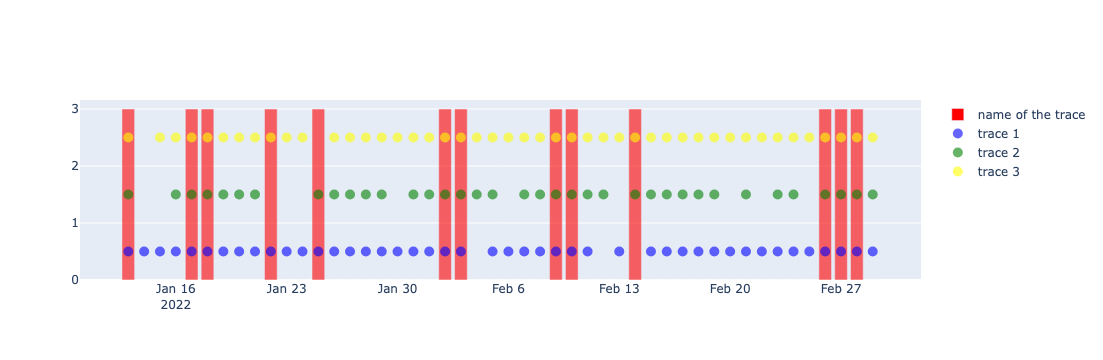

                                                  displayname  bar_height
date                                                                     
2022-01-13  [Cornflakes, Leinsamen, Hafermilch, Dinkelfloc...         2.5
2022-01-15  [Brötchen, Honig (fructosearm), Reissirup, Koc...         2.5
2022-01-16                                       [Käsestange]         2.5
2022-01-17  [Cornflakes, Leinsamen, Hafermilch, Dinkelfloc...         2.5
2022-01-18  [Cornflakes, Leinsamen, Hafermilch, Dinkelfloc...         2.5


In [35]:
import plotly.graph_objects as go
df = get_data_from_database(account_id=467)

sr = df[['date', 'complaint_same_day']].groupby('date').min().squeeze().astype(int) * 3  # 3 = height of bars
x = sr.index
y = sr.values
##########################
dfs = {}
traces = [go.Bar(x=x, y=y, name="name of the trace", marker=go.bar.Marker(color='red', opacity=0.6)),]
for i,(daytime,color) in enumerate(zip(["DINNER", "LUNCH", "BREAKFAST"], ["blue", "green", "yellow"])):
    dfs[daytime] = df.loc[df['daytime'] == daytime, ['date',  'displayname']].groupby('date').agg(list).sort_index()
    dfs[daytime]['bar_height'] = i + 0.5   # play with this?
    x = dfs[daytime].index
    y = dfs[daytime]['bar_height']
    trace = go.Scatter(x=x, y=y, mode='markers',
                       marker=go.scatter.Marker(color=color, opacity=0.6, size=10))
    traces.append(trace)
fig = go.Figure(data=traces)
fig.show()
# make the bars wider
# different colors for meals
# put meal names on the y axis instead of the numbers
# black circles round the dots?
print(dfs["BREAKFAST"].head())

In [42]:
dfs["BREAKFAST"]["displayname"].map(len)

date
2022-01-13    6
2022-01-15    4
2022-01-16    1
2022-01-17    6
2022-01-18    6
2022-01-19    7
2022-01-20    6
2022-01-21    7
2022-01-22    3
2022-01-23    3
2022-01-24    6
2022-01-26    3
2022-01-27    3
2022-01-28    4
2022-01-29    3
2022-01-30    3
2022-01-31    6
2022-02-01    6
2022-02-02    7
2022-02-03    6
2022-02-04    6
2022-02-05    3
2022-02-06    2
2022-02-07    5
2022-02-08    7
2022-02-09    6
2022-02-10    1
2022-02-11    3
2022-02-12    1
2022-02-13    3
2022-02-14    6
2022-02-15    6
2022-02-16    2
2022-02-17    4
2022-02-18    4
2022-02-19    2
2022-02-20    2
2022-02-21    4
2022-02-22    4
2022-02-23    3
2022-02-24    3
2022-02-25    1
2022-02-26    2
2022-02-27    2
2022-02-28    3
2022-03-01    4
Name: displayname, dtype: int64

In [43]:
from collections import OrderedDict

In [60]:
MEALS_MAPPING = OrderedDict([("BREAKFAST", "Frühstück"), ("LUNCH", "Mittagessen"), ("DINNER", "Abendessen")])
MEALS_MAPPING



OrderedDict([('BREAKFAST', 'Frühstück'),
             ('LUNCH', 'Mittagessen'),
             ('DINNER', 'Abendessen')])

In [62]:
list(MEALS_MAPPING.values())

['Frühstück', 'Mittagessen', 'Abendessen']

In [65]:
from units import A,B,C,D

dropdown_options = [
    {'label': "alle Mahlzeiten", 'value': A},
    {'label': "Frühstück", 'value': B}, 
    {'label': "Mittagessen", 'value': C}, 
    {'label': "Abendessen", 'value': D}
                    ]

In [68]:
[{'label': "alle Mahlzeiten", 'value': A}]

[{'label': label, 'value': value} for label,value in zip(["alle Mahlzeiten"] + list(MEALS_MAPPING.values()), (A,B,C,D))]

[{'label': 'alle Mahlzeiten', 'value': 'A'},
 {'label': 'Frühstück', 'value': 'B'},
 {'label': 'Mittagessen', 'value': 'C'},
 {'label': 'Abendessen', 'value': 'D'}]

In [84]:
for i,(daytime,mahlzeit,color) in enumerate(zip(*zip(*list(MEALS_MAPPING.items())[::-1]), ["blue", "green", "yellow"])):
    print(i,daytime,mahlzeit,color)

0 DINNER Abendessen blue
1 LUNCH Mittagessen green
2 BREAKFAST Frühstück yellow


In [78]:
from units import MEALS_MAPPING

ImportError: cannot import name 'MEALS_MAPPING' from 'units' (/Users/homefolder/projects/besseresser/src/units.py)

In [74]:
from units import A

In [82]:
MEALS_MAPPING = OrderedDict([("BREAKFAST", "Frühstück"), 
                             ("LUNCH", "Mittagessen"), 
                             ("DINNER", "Abendessen")])
tuple(zip(*list(MEALS_MAPPING.items())[::-1]))

(('DINNER', 'LUNCH', 'BREAKFAST'), ('Abendessen', 'Mittagessen', 'Frühstück'))

In [87]:
for i, daytime, mahlzeit, color in zip(range(3,0,-1), 
                                       *zip(*list(MEALS_MAPPING.items())), 
                                        ["blue", "green", "yellow"]):
    print(i, daytime, mahlzeit, color)

3 BREAKFAST Frühstück blue
2 LUNCH Mittagessen green
1 DINNER Abendessen yellow


      displayname  count
0      Hafermilch     23
1  Dinkelbrötchen     23
2     Choco Balls     22
3      Putenbrust     20
4     Putensalami     19
Index(['displayname', 'count'], dtype='object')


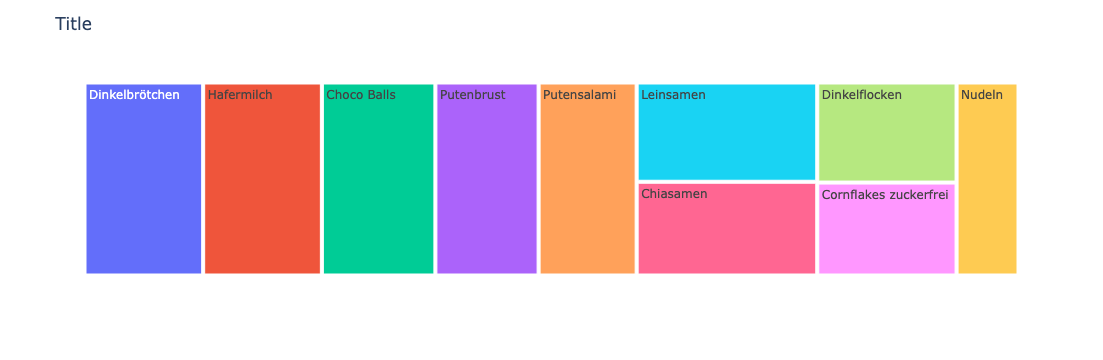

In [160]:
from helper_functions import get_data_from_database
import plotly.express as px

df = get_data_from_database(account_id=467)

TOP_N = 10

df = df['displayname'].value_counts().head(TOP_N).to_frame().reset_index()
fig = px.treemap(df, path=['displayname'], values='count', hover_data={'count':False})
fig.update_layout(title='Title')
fig.update_layout(hovermode=None)



print(df.head())
print(df.columns)





# Creating the treemap using Plotly Express


#fig = make_figure_1(df)
fig.show()

In [157]:
df = get_data_from_database(account_id=467)

df = df[df['daytime']=='BREAKFAST']

assert len(set(df['daytime'].values)) == 1, "The dataframe must contain only one type of meal"

TOP_N = 1  # if TOP_N >1 then must rewrite the code that follows for multiple arrays
sr = df[['meal_id', 'displayname']].groupby('meal_id').agg(tuple).groupby('displayname').size().sort_values(ascending=False).head(TOP_N)
sr.name = None        # not necessary - jic
sr.index.name = None  # not necessary - jic
a = sr.index.values[0]  # a = array with the order (in which the user eneterd the ingredients) preserved
sr.name = None
sr.index.name = None
#df[['meal_id', 'displayname']].groupby('meal_id').agg(tuple).sort_values('displayname')
a

('Cornflakes',
 'Leinsamen',
 'Hafermilch',
 'Dinkelflocken',
 'Choco Balls',
 'Chiasamen')

In [139]:
df[['meal_id', 'displayname']].groupby('meal_id').agg(tuple).groupby('displayname').size().sort_values(ascending=False)

displayname
(Bananenbrot,)                                                                                                                                                     2
(Avocado,)                                                                                                                                                         1
(Veganer Proteinriegel, Vegane Schokolade)                                                                                                                         1
(Sommerrollenpapier, Rocula, Gurke, Paprika, Marinierter Tofu, Möhren, Erdnusssoße)                                                                                1
(Süßkartoffel, Kokosjoghurt, Veganer Feta, Paprika, Möhre, frischer Spinat, Kokosöl, Pfeffer, Salz, Muskatnuss, Erbsen)                                            1
(Tofu, Agavendicksaft, Erdnussmus, Sojasauce glutenfrei, Sommerrollenblatt, Salat, Paprika, Möhre, Gurke, Koriander, Zwiebel, Knoblauch, Zitronensaft, Datteln)    

In [145]:
df_temp = pd.DataFrame(a, columns=["aaa"])


aaa
0     Cornflakes
1      Leinsamen
2     Hafermilch
3  Dinkelflocken
4    Choco Balls
5      Chiasamen

In [156]:
from pandas import DataFrame

def get_figure_title(*args):
    """TODO"""
    if hasattr(args, '__len__') and type(args[0]) is DataFrame:
        df, args = args[0], args[1:]
    title = str(args) if DEBUG == True else args.get('title') if type(args) is dict else None 
    return title

get_figure_title([1,2,3])

'([1, 2, 3],)'

In [169]:
df = get_data_from_database(account_id=467)

TOP_N = 10

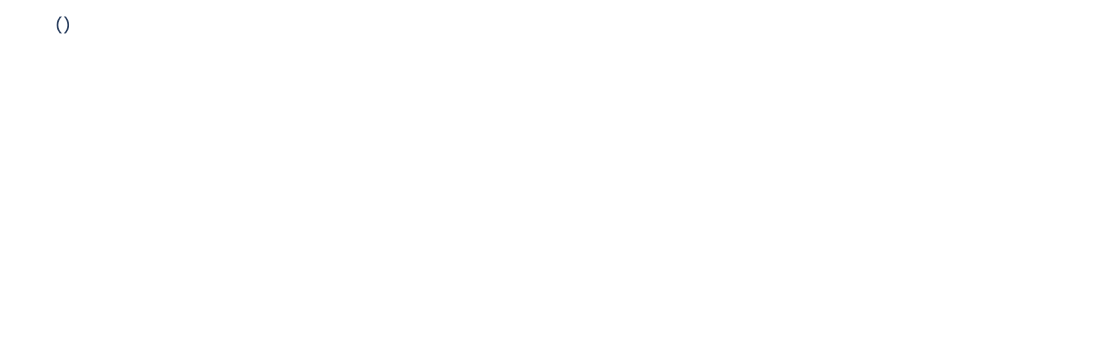

In [189]:
ERR_PREFIX = "BesserEsser:"

def get_figure_title(*args):
    """
    Helper function to get an appropriate title for a figure.
    Change the logic here as necessary
    """
    # Maybe use a list of all titles here?
    titles = ["Grafik 1", ...]   # e.g. titles[args] id type(args) is int

    if hasattr(args, '__len__') and len(args)==1:
        args = args[0]

    if hasattr(args, '__len__') and len(args)>1 and type(args[0]) is DataFrame:
        df, args = args[0], args[1:]
    title = str(args) if DEBUG == True else args.get('title') if type(args) is dict else None 
    return title
    

def make_tiles_plot(dataframe=None, items=None, values=None, *args):
    """
    Makes a simple Treemap plot (non-hierarchical aka tiles-plot?)
    Returns a plotly figure.
    """

    if items is None:
        raise ValueError(f"{ERR_PREFIX} 'items' must be explicitely provided")

    fig = px.treemap(dataframe, path=[items], values=values)  #hover_data={'count':False}?
    fig.update_layout(hovermode=None)   # how to deactivate tooltips?
    fig.update_layout(title=get_figure_title(args))
    return fig

df_for_tiles_plot = df['displayname'].value_counts().head(TOP_N).to_frame().reset_index()
fig = make_tiles_plot(items=[])
fig.show()

In [181]:
df_for_tiles_plot

displayname  count
0             Hafermilch     23
1         Dinkelbrötchen     23
2            Choco Balls     22
3             Putenbrust     20
4            Putensalami     19
5              Leinsamen     18
6              Chiasamen     17
7          Dinkelflocken     14
8  Cornflakes zuckerfrei     13
9                 Nudeln     12

In [192]:
w = dcc.Slider(2, 5, 1, value=2, id="unit_4_component_3")
dir(w)

['REQUIRED',
 'UNDEFINED',
 '_REQUIRED',
 '_UNDEFINED',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_base_nodes',
 '_children_props',
 '_get_set_or_delete',
 '_id_str',
 '_js_dist',
 '_namespace',
 '_prop_names',
 '_set_random_id',
 '_traverse',
 '_traverse_ids',
 '_traverse_with_paths',
 '_type',
 '_valid_wildcard_attributes',
 'available_properties',
 'available_wildcard_properties',
 'id',
 'max',
 'min',
 'step',
 'to_plotly_json',
 'value']

In [205]:
df = get_data_from_database(account_id=467)

df = df[df['daytime']=='BREAKFAST']
df

account_id       date  ...  complaint_same_day complaint_next_day
0           467 2022-01-13  ...                True              False
1           467 2022-01-13  ...                True              False
2           467 2022-01-13  ...                True              False
3           467 2022-01-13  ...                True              False
4           467 2022-01-13  ...                True              False
..          ...        ...  ...                 ...                ...
450         467 2022-02-28  ...                True              False
454         467 2022-03-01  ...               False              False
455         467 2022-03-01  ...               False              False
456         467 2022-03-01  ...               False              False
457         467 2022-03-01  ...               False              False

[185 rows x 10 columns]

In [240]:
#from numpy import unique

df_temp = df[['meal_id', 'displayname']].groupby('meal_id').agg(tuple)
sets = [frozenset(tuple(e[0])) for e in df_temp.values.tolist()]
sets

[frozenset({'Chiasamen',
            'Choco Balls',
            'Cornflakes',
            'Dinkelflocken',
            'Hafermilch',
            'Leinsamen'}),
 frozenset({'Brötchen', 'Honig (fructosearm)', 'Kochschinken', 'Reissirup'}),
 frozenset({'Käsestange'}),
 frozenset({'Chiasamen',
            'Choco Balls',
            'Cornflakes',
            'Dinkelflocken',
            'Hafermilch',
            'Leinsamen'}),
 frozenset({'Chiasamen',
            'Choco Balls',
            'Cornflakes',
            'Dinkelflocken',
            'Hafermilch',
            'Leinsamen'}),
 frozenset({'Chiasamen',
            'Choco Balls',
            'Dinkelflocken',
            'Hafermilch',
            'Leinsamen',
            'Maiscornflakes',
            'Schokopudding (Laktose,- Fructose- und Glutenfrei)'}),
 frozenset({'Chiasamen',
            'Choco Balls',
            'Dinkelflocken',
            'Hafermilch',
            'Leinsamen',
            'Maiscornflakes'}),
 frozenset({'Chiasam

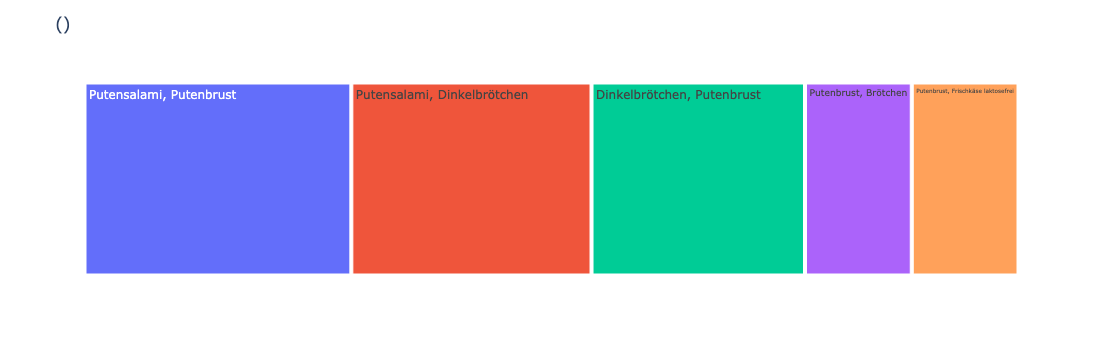

In [307]:
a,b,c,d,e = "abcde"

meals = [{a,b,c}, {a,b,c}, {a,b,c,d}, {b,c}, {a,}, {}]


def compute_combination_occurrence(sets, cardinality=2):
    """
    TODO
    Returns:
        collections.Counter object
    """
    subsets = frozenset(frozenset(e) for e in sum([list(combinations(e, cardinality)) for e in sets], []))
    return Counter({subset: sum(subset.issubset(meal) for meal in meals) for subset in subsets})


from collections import Counter
from itertools import combinations

TOP_N = 5
df = get_data_from_database(account_id=467)
df = df[df['daytime']=='LUNCH']

df_aggregated = df[['meal_id', 'displayname']].groupby('meal_id').agg(tuple)
meals = [frozenset(tuple(e[0])) for e in df_aggregated.values.tolist()]

cardinality = 2  # length of a set
counter = compute_combination_occurrence(meals, cardinality=cardinality)
df_for_plot = DataFrame([(", ".join(e[0]), e[1]) for e in counter.most_common(TOP_N)], columns=["combination", "count"])
fig = make_tiles_plot(df_for_plot, 'combination', 'count')



def make_tiles_plot(dataframe=None, items=None, values=None, *args):
    """
    Makes a simple Treemap plot (non-hierarchical aka tiles-plot?)
    Returns a plotly figure.
    """

    if items is None:
        raise ValueError(f"{ERR_PREFIX} 'items' must be explicitely provided")

    fig = px.treemap(dataframe, path=[items], values=values)  #hover_data={'count':False}?
    fig.update_layout(hovermode=None)   # how to deactivate tooltips?
    fig.update_layout(title=get_figure_title(args))
    return fig

fig = make_tiles_plot(df_for_plot, 'combination', 'count')
fig.show()

In [290]:
for subset in subsets:
    #print(sum(subset.issubset(meal) for meal in meals))
    ...

from collections import Counter
counter = Counter({subset: sum(subset.issubset(meal) for meal in meals) for subset in subsets})
DataFrame([(", ".join(e[0]), e[1]) for e in counter.most_common(3)], columns=["combination", "count"])

combination  count
0        c, b      4
1        a, b      3
2        c, a      3

In [304]:
a,b,c,d,e = "abcde"

meals = [{a,b,c}, {a,b,c}, {a,b,c,d}, {b,c}, {a,}, {}]


def compute_combination_occurrence(sets, cardinality=2):
    """
    TODO
    Returns:
        collections.Counter object
    """
    subsets = frozenset(frozenset(e) for e in sum([list(combinations(e, cardinality)) for e in sets], []))
    return Counter({subset: sum(subset.issubset(meal) for meal in meals) for subset in subsets})

compute_combination_occurrence(meals)

Counter({frozenset({'b', 'c'}): 4,
         frozenset({'a', 'b'}): 3,
         frozenset({'a', 'c'}): 3,
         frozenset({'a', 'd'}): 1,
         frozenset({'c', 'd'}): 1,
         frozenset({'b', 'd'}): 1})

In [273]:
{1,2,3}.issubset({1,2,3,4})

True

In [299]:
df_temp

displayname
meal_id                                                   
468      (Cornflakes, Leinsamen, Hafermilch, Dinkelfloc...
574      (Brötchen, Honig (fructosearm), Reissirup, Koc...
683                                          (Käsestange,)
742      (Cornflakes, Leinsamen, Hafermilch, Dinkelfloc...
803      (Cornflakes, Leinsamen, Hafermilch, Dinkelfloc...
914      (Schokopudding (Laktose,- Fructose- und Gluten...
980      (Maiscornflakes, Leinsamen, Hafermilch, Dinkel...
1034     (Cornflakes, Leinsamen, Hafermilch, Dinkelfloc...
1035                                        (Dinkelkekse,)
1076     (Dinkelbrötchen, Putensalami, Honig (fructosea...
1169           (Kaiserschmarrn, Reissirup, Dextrosepulver)
1191             (Maiscornflakes, Choco Balls, Hafermilch)
1203             (Dinkelbrötchen, Putenbrust, Putensalami)
3167        (Dinkelbrötchen, Honig (fructosearm), Nutella)
3912     (Dinkelbrötchen, Putensalami, Honig (fructosea...
4386     (Maiscornflakes, Choco Balls, Leinsamen, Chias...
4886        (Dinkelbrötchen, Honig (fructosearm), Nutella)
5327                      (Dinkelbrötchen, Nutella, Bacon)
5495     (Cornflakes zuckerfrei, Leinsamen, Chiasamen, ...
5496                                         (Hafermilch,)
5861     (Cornflakes, Chiasamen, Leinsamen, Dinkelflock...
6325     (Cornflakes zuckerfrei, Dinkelflocken, Leinsam...
6569                             (Schoko-Vanillehörnchen,)
6690     (Cornflakes, Chiasamen, Hafermilch, Leinsamen,...
6948     (Cornflakes zuckerfrei, Chiasamen, Dinkelflock...
7533          (Dinkelbrötchen, Honig (fructosearm), Bacon)
7712                                   (Käsestange, Speck)
7835     (Cornflakes zuckerfrei, Chiasamen, Leinsamen, ...
8144     (Cornflakes zuckerfrei, Chiasamen, Leinsamen, ...
8145     (Schokopudding (Laktose,- Fructose- und Gluten...
8475     (Cornflakes zuckerfrei, Leinsamen, Chiasamen, ...
8889                                       (Laugenstange,)
9173      (Cornflakes zuckerfrei, Choco Balls, Hafermilch)
9218                                             (Brezel,)
9667            (Körnersemmel, Honig fructosearm, Nutella)
9774     (Cornflakes zuckerfrei, Choco Balls, Chiasamen...
9927     (Schokopudding (Laktose,- Fructose- und Gluten...
10015    (Cornflakes zuckerfrei, Leinsamen, Chiasamen, ...
10163    (Schokopudding (Laktose,- Fructose- und Gluten...
10317                 (Cornflakes zuckerfrei, Choco Balls)
10730    (Cornflakes zuckerfrei, Choco Balls, Hafermilc...
10904    (Dinkelbrötchen, Putenbrust, Geflügelsalami, F...
11010                              (Laugenstange, Nutella)
11172                              (Laugenstange, Nutella)
11299    (Dinkelbrötchen, Putenbrust, Geflügelsalami, F...
11463    (Dinkelbrötchen, Honig fructosearm, Putensalam...
11628    (Brot glutenfrei, Honig fructosearm, Putensalami)
11785     (Dinkelbrötchen, Honig fructosearm, Putensalami)
11872                                (Kuchen fructosearm,)
12086                              (Laugenstange, Nutella)
12112                                    (Nutella, Brezel)
12348    (Cornflakes zuckerfrei, Choco Balls fructosear...
12466    (Cornflakes zuckerfrei, Choco Balls fructosear...

In [342]:
df = get_data_from_database(account_id=132501)
df

account_id       date  ...  complaint_same_day complaint_next_day
0        132501 2023-09-05  ...               False               True
1        132501 2023-09-05  ...               False               True
2        132501 2023-09-05  ...               False               True
3        132501 2023-09-06  ...                True               True
4        132501 2023-09-06  ...                True               True
..          ...        ...  ...                 ...                ...
778      132501 2023-10-25  ...                True              False
779      132501 2023-10-25  ...                True              False
780      132501 2023-10-26  ...               False              False
781      132501 2023-10-26  ...               False              False
782      132501 2023-10-26  ...               False              False

[782 rows x 10 columns]

In [343]:
set1 = set(df['displayname'][df['complaint_same_day']==True]).union(set(df['displayname'][df['complaint_next_day']==True]))
set2 = set(df['displayname'][df['complaint_same_day']==False]).union(set(df['displayname'][df['complaint_next_day']==False]))
set3 = set1.difference(set2)
set4 = set3 or set1  # recommend to exclude these ingredients

In [359]:

def make_recommendation_table(df):
    """TODO"""
    set1 = set(df['displayname'][df['complaint_same_day']==True]).union(set(df['displayname'][df['complaint_next_day']==True]))
    set2 = set(df['displayname'][df['complaint_same_day']==False]).union(set(df['displayname'][df['complaint_next_day']==False]))
    set3 = set1.difference(set2)
    set4 = set3 or set1  # recommend to exclude these ingredients
    
    potentially_super_bad_list = df.loc[(df['complaint_same_day']==True) & (df['complaint_next_day']==True), 'displayname']
    return (DataFrame(set4, columns=["ingredient"])
          .assign(especially_bad=lambda df: df.iloc[:,0].isin(potentially_super_bad_list))
          .sort_values(['especially_bad', 'ingredient'], ascending=[False, True])
            .drop("especially_bad", axis=1).reset_index(drop=True)
            .rename({'ingredient':""}, axis=1))
    
df_for_unit_5 = make_recommendation_table(df)

In [360]:
df_for_unit_5

0            1/2 l Wasser
1             1/4Ciabatta
2    200 Gram Frikadellen
3      200 gr Frikadellen
4           Bratwürstchen
5        Calippo Cola Eis
6       Fritz-limo orange
7      Griechische Nudeln
8   Monster Engerie Ultra
9                   Möhre
10               Pak Choi
11            Paprika rot
12        Schokocroissant

In [331]:
(df['complaint_same_day']==True) & (df['complaint_next_day']==True)

6      False
7      False
8      False
36     False
47      True
       ...  
451    False
452    False
458    False
459    False
460    False
Length: 122, dtype: bool

In [380]:



sr = (df[['displayname', 'complaint_same_day', 'complaint_next_day']]
 .groupby('displayname').sum()
 .sort_values(['complaint_same_day', 'complaint_next_day'], ascending=[False, False])
 .sum(axis=1).replace({0:None}).dropna().reset_index()['displayname'])

ranking = {v:k for k,v in sr.items()}
ranking

{'Käse': 0,
 'Salami': 1,
 'Gurke': 2,
 '0,7 L Wasser': 3,
 '0,5 l Wasser': 4,
 '2 Brötchen': 5,
 'Tomate': 6,
 'zukini': 7,
 '1 l Wasser': 8,
 '1 gekochtes Ei': 9,
 '1 l apfelschorle': 10,
 'Bratwürstchen': 11,
 'Griechische Nudeln': 12,
 'Möhren': 13,
 'Nutella': 14,
 'Pak Choi': 15,
 'Paprika rot': 16,
 'Pizza': 17,
 'Tomatensoße': 18,
 'Kochschinken': 19,
 'Paprika': 20,
 'Salat': 21,
 'Zwiebel': 22,
 'pudding paula': 23,
 '1 Kaktus Wasser Eis': 24,
 '1 Pauler Schoko Pudding': 25,
 'Krustenbrot': 26,
 '1 Brötchen': 27,
 'Paulaner Spezi 0,5': 28,
 'Schinken': 29,
 '1/2 l Wasser': 30,
 '1/4Ciabatta': 31,
 '200 Gram Frikadellen': 32,
 '200 gr Frikadellen': 33,
 'Calippo Cola Eis': 34,
 'Fritz-limo orange': 35,
 'Ketchup': 36,
 'Ketshup': 37,
 'Knoblauchdressing': 38,
 'Mais': 39,
 'Monster Engerie Ultra': 40,
 'Möhre': 41,
 'Schokocroissant': 42,
 '0,3 mezzomix': 43,
 '0,3l Fritz limo Orange': 44,
 '0,4 l Cola': 45,
 '0,5 l Cola': 46,
 '0,5 wasser': 47,
 '0,7L Wasser': 48,
 '1 Ei': 49

In [409]:

sr = (df[['displayname', 'complaint_same_day', 'complaint_next_day']]
 .groupby('displayname').sum()
 .sort_values(['complaint_same_day', 'complaint_next_day'], ascending=[False, False])
 .sum(axis=1).replace({0:None}).dropna().reset_index()['displayname'])

ranking = {v:k for k,v in sr.items()}


def make_recommendation_table(df):
    """TODO"""
    TOP_N = 10
    
    set1 = set(df['displayname'][df['complaint_same_day']==True]).union(set(df['displayname'][df['complaint_next_day']==True]))
    set2 = set(df['displayname'][df['complaint_same_day']==False]).union(set(df['displayname'][df['complaint_next_day']==False]))
    set3 = set1.difference(set2)

    # make a ranking
    sr = (df[['displayname', 'complaint_same_day', 'complaint_next_day']]
     .groupby('displayname').sum()
     .sort_values(['complaint_same_day', 'complaint_next_day'], ascending=[False, False])
     .sum(axis=1).replace({0:None}).dropna().reset_index()['displayname'])
    
    ranking = {v:k for k,v in sr.items()}

    return (pd.DataFrame(set3 or set1)
            .assign(ranking=lambda df: df.squeeze().map(ranking)).dropna()
            .sort_values("ranking", ascending=True).head(TOP_N)
           .drop("ranking", axis=1)).reset_index(drop=True).rename({0:''}, axis=1)

df = get_data_from_database(account_id=132444)
make_recommendation_table(df)

0  Camenbert lactosefrei
1  Camenbert laktosefrei
2           Tomatensauce
3             Butterkäse
4                 Ananas
5          Bolognesesoße
6           Fleischwurst
7  Haferbrot ohne weizen
8      Milch lactosefrei
9                Paprika

In [410]:
df = get_data_from_database(account_id=132444)
df

account_id       date  ...  complaint_same_day complaint_next_day
0        132444 2023-09-02  ...               False               True
1        132444 2023-09-02  ...               False               True
2        132444 2023-09-02  ...               False               True
3        132444 2023-09-02  ...               False               True
4        132444 2023-09-02  ...               False               True
..          ...        ...  ...                 ...                ...
443      132444 2023-10-09  ...               False              False
444      132444 2023-10-09  ...               False              False
445      132444 2023-10-09  ...               False              False
446      132444 2023-10-09  ...               False              False
447      132444 2023-10-09  ...               False              False

[448 rows x 10 columns]

In [527]:
import re
#|(\d+[.,]\d+)
pattern = re.compile(r"(\d+[.,]\d+)|(\b\w\b)|(-\s)|(\s-)|(\A-)|[.:0-9]")
s = "l,l,.l 10,25 3.5 l Wein - Khjh - 1 k KolaPepsi 12:34 - K -"

new = pattern.sub('', s).strip()
new

',,    Wein Khjh   KolaPepsi'

In [528]:
(r"(\d+[.,]\d+)|(\b\w\b)|(-\s)|(\s-)|(\A-)|[.:0-9]")

'(\\d+[.,]\\d+)|(\\b\\w\\b)|(-\\s)|(\\s-)|(\\A-)|[.:0-9]'

In [532]:
df_temp = df.loc[df['daytime'] == daytime, ['date',  'displayname']].groupby('date').agg(list).sort_index()
df_temp['displayname'] = df_temp['displayname'].apply(", ".join)
df_temp

displayname
date                                                         
2023-09-03  cole slaw salat, Cevapcici Rind, Putenbrustfil...
2023-09-04                        Schweinegulasch, Kartoffeln
2023-09-05  Chinesische Bratnudeln, Sojasprossen, Gemüse, ...
2023-09-06                 Schweinegulasch, Nudeln, Cappucino
2023-09-07  Sandwichbrot vollkorn, Ananas, gekochter Schin...
2023-09-08  Graubrot, Beefsteakhack, Butter, Gewürzgurke, ...
2023-09-09  Graubrot, Gouda jung, Salami, Gewürzgurke, Van...
2023-09-10         Graubrot, Butter, Gouda, Schokoladenkuchen
2023-09-12  Roggenbrot, Butter, Lachsschinken, Käse, Apfel...
2023-09-13        Spaghetti, Tomatensauce, Mozarella gerieben
2023-09-14  fitnessbrötchen, Butter, Lachsschinken, Käse, ...
2023-09-15  gebratene Gnoccis, Gebratene Nudeln, Sommersby...
2023-09-16  Cole slow Salat, Cevapici, Karibik Grillsauce,...
2023-09-17  Hähnchenbrustfilet, Cole slow Salat, Baquetteb...
2023-09-19     Kartoffeln, Weißkohl, Hack, Knorr braune Sauce
2023-09-20     Kartoffeln, Weißkohl, Hack, Knorr braune Sauce
2023-09-21                        Spaghetti, Maggi, Pesto rot
2023-09-23  Pizza, Ananas, gekochter Schinken, Käse, Tomat...
2023-09-24     Spaghetti, Bolognesesoße, geriebener Mozarella
2023-09-25  Lindennudeln glutenfrei, Bolognesesoße, gerieb...
2023-09-26  Roggenbrot, Butter, Camenbert lactosefrei, Bee...
2023-09-27          Reis, Tomatensauce, Paprika, Fleischwurst
2023-09-28          Reis, Tomstensauce, Paprika, Fleischwurst
2023-09-29  Roggenbrot, Butter, Zwiebelmett Schwein, Zwieb...
2023-09-30  Hähnchenfleisch, Pommes, Tzaziki, Krautsalat, ...
2023-10-01                                         Nudelsalat
2023-10-02                                         Nudelsalat
2023-10-03                              Nudelsalat, Cevapcici
2023-10-04  fitnessbrötchen, Butter, Käse, Activia Joghurt...
2023-10-05           Penne Nudeln, gekochter Schinken, Spinat
2023-10-06     fitnessbrötchen, Butter, Käse, Activia Joghurt
2023-10-07  Vollkornbrot, Weizenbrötchen, Butter, Käse, Ph...
2023-10-08                          Backfisch, Kartoffelpüree
2023-10-09                                   Hack-Lauch Suppe

In [530]:
df_temp

displayname
date                                                         
2023-09-03  [cole slaw salat, Cevapcici Rind, Putenbrustfi...
2023-09-04                      [Schweinegulasch, Kartoffeln]
2023-09-05  [Chinesische Bratnudeln, Sojasprossen, Gemüse,...
2023-09-06               [Schweinegulasch, Nudeln, Cappucino]
2023-09-07  [Sandwichbrot vollkorn, Ananas, gekochter Schi...
2023-09-08  [Graubrot, Beefsteakhack, Butter, Gewürzgurke,...
2023-09-09  [Graubrot, Gouda jung, Salami, Gewürzgurke, Va...
2023-09-10       [Graubrot, Butter, Gouda, Schokoladenkuchen]
2023-09-12  [Roggenbrot, Butter, Lachsschinken, Käse, Apfe...
2023-09-13      [Spaghetti, Tomatensauce, Mozarella gerieben]
2023-09-14  [fitnessbrötchen, Butter, Lachsschinken, Käse,...
2023-09-15  [gebratene Gnoccis, Gebratene Nudeln, Sommersb...
2023-09-16  [Cole slow Salat, Cevapici, Karibik Grillsauce...
2023-09-17  [Hähnchenbrustfilet, Cole slow Salat, Baquette...
2023-09-19   [Kartoffeln, Weißkohl, Hack, Knorr braune Sauce]
2023-09-20   [Kartoffeln, Weißkohl, Hack, Knorr braune Sauce]
2023-09-21                      [Spaghetti, Maggi, Pesto rot]
2023-09-23  [Pizza, Ananas, gekochter Schinken, Käse, Toma...
2023-09-24   [Spaghetti, Bolognesesoße, geriebener Mozarella]
2023-09-25  [Lindennudeln glutenfrei, Bolognesesoße, gerie...
2023-09-26  [Roggenbrot, Butter, Camenbert lactosefrei, Be...
2023-09-27        [Reis, Tomatensauce, Paprika, Fleischwurst]
2023-09-28        [Reis, Tomstensauce, Paprika, Fleischwurst]
2023-09-29  [Roggenbrot, Butter, Zwiebelmett Schwein, Zwie...
2023-09-30  [Hähnchenfleisch, Pommes, Tzaziki, Krautsalat,...
2023-10-01                                       [Nudelsalat]
2023-10-02                                       [Nudelsalat]
2023-10-03                            [Nudelsalat, Cevapcici]
2023-10-04  [fitnessbrötchen, Butter, Käse, Activia Joghur...
2023-10-05         [Penne Nudeln, gekochter Schinken, Spinat]
2023-10-06   [fitnessbrötchen, Butter, Käse, Activia Joghurt]
2023-10-07  [Vollkornbrot, Weizenbrötchen, Butter, Käse, P...
2023-10-08                        [Backfisch, Kartoffelpüree]
2023-10-09                                 [Hack-Lauch Suppe]

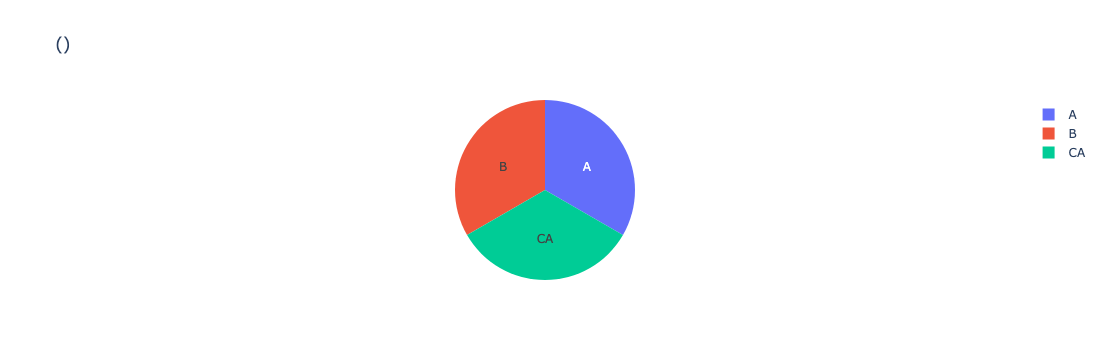

In [546]:

def make_figure_3(df, *args):
    """TODO"""

    ITEMS_COLUMN_NAME = 'displayname' # comes from the SQL database
    GROUPBY_COLUMN_NAME = 'meal_id'   # comes from the SQL database
    TOP_N = 1             # if TOP_N >1 then must rewrite the code that follows for multiple arrays
    sr = (df[[GROUPBY_COLUMN_NAME, ITEMS_COLUMN_NAME]].groupby(GROUPBY_COLUMN_NAME).agg(tuple)
                                            .groupby(ITEMS_COLUMN_NAME).size()
                                            .sort_values(ascending=False).head(TOP_N))
    
    # The following code block will have to be rewritten for multiple lists i.e. if TOP_N > 1
    # items = array with the order (in which the user entered the ingredients) preserved
    items = sr.index.values[0] if len(sr.index.values) > 0 else []
    fig = make_tiles_plot(items=items)
    fig.update_layout(title=get_figure_title(args))
    return fig


df = get_data_from_database(account_id=132444)

def make_tiles_plot(dataframe=None, items=None, values=None, *args):
    """
    Makes a simple Treemap plot (non-hierarchical aka tiles-plot?)
    Returns a plotly figure.
    """

    if items is None:
        raise ValueError(f"{ERR_PREFIX} 'items' must be explicitely provided")

    fig = px.treemap(dataframe, path=[items], values=values)  #hover_data={'count':False}?
    fig.update_layout(hovermode=None)   # how to deactivate tooltips?
    fig.update_layout(title=get_figure_title(args))
    return fig


def make_pie_plot(dataframe=None, items=None, values=None, *args):
    """
    TODO: test and debug this function to make it work for all cases (df / array)
    TODO: deactivate tooltips
    """
    
    if items is None:
        raise ValueError(f"{ERR_PREFIX} 'items' must be explicitely provided")

    # To avoid px error if "unhashable type"
    items = tuple(items) if type(items) is not str else items

    fig = px.pie(dataframe, names=items,
                 title='TODO',
                 hover_data=[items], labels={items:'Lebensmittel'})
    fig.update_traces(textposition='inside', textinfo='label')
    fig.update_layout(hovermode=None)   # how to deactivate tooltips?
    fig.update_layout(title=get_figure_title(args))
    return fig



make_pie_plot(items=["A", "B", "CA"]).show()



In [556]:
import plotly.graph_objs as go
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
data = [go.Bar(
   x = langs,
   y = students
)]
fig = go.Figure(data=data)
fig.update_traces(textposition='inside', textinfo='label')
iplot(fig)

ValueError: Invalid property specified for object of type plotly.graph_objs.Bar: 'textinfo'

Did you mean "text"?

    Valid properties:
        alignmentgroup
            Set several traces linked to the same position axis or
            matching axes to the same alignmentgroup. This controls
            whether bars compute their positional range dependently
            or independently.
        base
            Sets where the bar base is drawn (in position axis
            units). In "stack" or "relative" barmode, traces that
            set "base" will be excluded and drawn in "overlay" mode
            instead.
        basesrc
            Sets the source reference on Chart Studio Cloud for
            `base`.
        cliponaxis
            Determines whether the text nodes are clipped about the
            subplot axes. To show the text nodes above axis lines
            and tick labels, make sure to set `xaxis.layer` and
            `yaxis.layer` to *below traces*.
        constraintext
            Constrain the size of text inside or outside a bar to
            be no larger than the bar itself.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.bar.ErrorX` instance or
            dict with compatible properties
        error_y
            :class:`plotly.graph_objects.bar.ErrorY` instance or
            dict with compatible properties
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.bar.Hoverlabel` instance
            or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. Finally, the template string has access
            to variables `value` and `label`. Anything contained in
            tag `<extra>` is displayed in the secondary box, for
            example "<extra>{fullData.name}</extra>". To hide the
            secondary box completely, use an empty tag
            `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        insidetextanchor
            Determines if texts are kept at center or start/end
            points in `textposition` "inside" mode.
        insidetextfont
            Sets the font used for `text` lying inside the bar.
        legend
            Sets the reference to a legend to show this trace in.
            References to these legends are "legend", "legend2",
            "legend3", etc. Settings for these legends are set in
            the layout, under `layout.legend`, `layout.legend2`,
            etc.
        legendgroup
            Sets the legend group for this trace. Traces and shapes
            part of the same legend group hide/show at the same
            time when toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.bar.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with "reversed" `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items. When having
            unranked or equal rank items shapes would be displayed
            after traces i.e. according to their order in data and
            layout.
        legendwidth
            Sets the width (in px or fraction) of the legend for
            this trace.
        marker
            :class:`plotly.graph_objects.bar.Marker` instance or
            dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appears as the
            legend item and on hover.
        offset
            Shifts the position where the bar is drawn (in position
            axis units). In "group" barmode, traces that set
            "offset" will be excluded and drawn in "overlay" mode
            instead.
        offsetgroup
            Set several traces linked to the same position axis or
            matching axes to the same offsetgroup where bars of the
            same position coordinate will line up.
        offsetsrc
            Sets the source reference on Chart Studio Cloud for
            `offset`.
        opacity
            Sets the opacity of the trace.
        orientation
            Sets the orientation of the bars. With "v" ("h"), the
            value of the each bar spans along the vertical
            (horizontal).
        outsidetextfont
            Sets the font used for `text` lying outside the bar.
        selected
            :class:`plotly.graph_objects.bar.Selected` instance or
            dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.bar.Stream` instance or
            dict with compatible properties
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textangle
            Sets the angle of the tick labels with respect to the
            bar. For example, a `tickangle` of -90 draws the tick
            labels vertically. With "auto" the texts may
            automatically be rotated to fit with the maximum size
            in bars.
        textfont
            Sets the font used for `text`.
        textposition
            Specifies the location of the `text`. "inside"
            positions `text` inside, next to the bar end (rotated
            and scaled if needed). "outside" positions `text`
            outside, next to the bar end (scaled if needed), unless
            there is another bar stacked on this one, then the text
            gets pushed inside. "auto" tries to position `text`
            inside the bar, but if the bar is too small and no bar
            is stacked on this one the text is moved outside. If
            "none", no text appears.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. Finally, the template string has access
            to variables `value` and `label`.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.bar.Unselected` instance
            or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        width
            Sets the bar width (in position axis units).
        widthsrc
            Sets the source reference on Chart Studio Cloud for
            `width`.
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        
Did you mean "text"?

Bad property path:
textinfo
^^^^^^^^

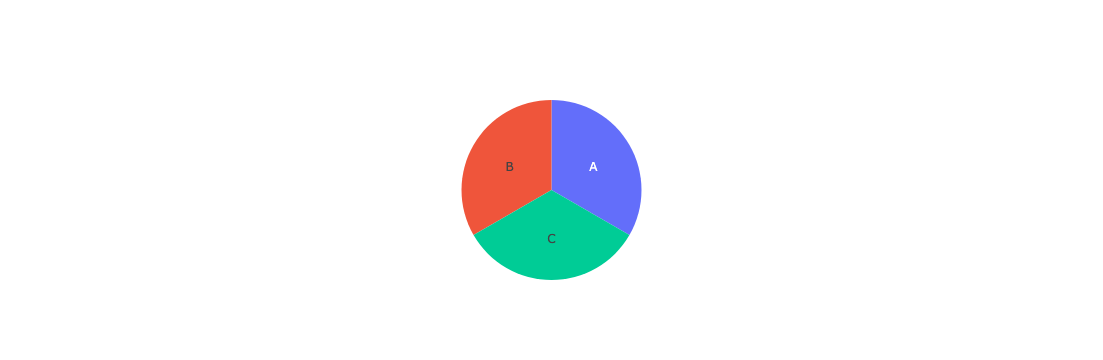

In [563]:
import plotly.graph_objs as go


def make_pie_plot(items, *args):
    """
    Makes a simple pie chart with equal slices
    TODO: test and debug this function to make it work for all cases (df / array)
    TODO: deactivate tooltips
    """

    # To avoid px error if "unhashable type"
    items = tuple(items)

    fig = go.Figure(data=go.Pie({'labels': items}, hoverinfo='skip'))
    fig.update_traces(textposition='inside', textinfo='label')
    fig.update_layout(hovermode=None, showlegend=False) 
    fig.update_layout(title=get_figure_title(*args))
    return fig


fig = go.Figure(data=go.Pie({'labels': items}, hoverinfo='skip'))
fig.update_traces(textposition='inside', textinfo='label')
fig.update_layout(hovermode=None, showlegend=False) 
fig.show()